To simulate a chromosome we need the tile thresholds/cutoffs from the original chromosome, the learned interaction strength maps from the same, and then thats everything we need to use the epigenetic signals for the new chromosome or cell type.


filename = "{0}-small:{1}-actual:{2}-{3}".format(celltype,small_resolution,resolution,"wgtiles")
HCT116-untreated-small:5000-actual:25000-wgtiles

mapfileoutname = "{0}-{1}kb-chr{2}-{3}-learnedmaps.csv".format(celltype,resolution//1000,chrnames[chrindex],signame)
HCT116-untreated-25kb-chr2-Gro-tiles-learnedmaps.csv

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

figfold = "figure3"

celltype = "HCT116-untreated"
#hic_directory = "/Zulu/mike/dumped-hic/GM12878/"
hic_directory = "/Zulu/mike/dumped-hic/HCT116/"
#hic_prefix = "GM12878-untreated-NOKR-dumped"
#hic_prefix = "GM12878-untreated-q30-KR-dumped"
hic_prefix = "HCT116-untreated-q30-KR-dumped"
mapcelltype = "HCT116-untreated"

male = True

resolution = 100000
small_resolution = 100000
distance_min = 0
distance_min_bins = int(distance_min/resolution)
distance_max = 1000000000
distance_max_bins = int(distance_max/resolution)
comp_num = 3
chrstart = 0
chrstop = 23
mapindex = 1
#signal files
filenames = []
#signal names
names = []
filenames.append("hct116-H3K9me3-ENCFF402WZH.bigWig")
names.append("H3K9me3")
filenames.append("hct116-H3K27me3-ENCFF030SYQ.bigWig")
names.append("H3K27me3")
filenames.append("hct116-H3K27ac-ENCFF225QAB.bigWig")
names.append("H3K27ac")
#filenames.append("GSE86165_HCT116_gro.bw")
#names.append("Gro")
#filenames.append("hct116-H3K9me2-ENCFF854QMM.bigWig")
#names.append("H3K9me2")
#filenames.append("hct116-H3K36me3-ENCFF062CBC.bigWig")
#names.append("H3K36me3")
chrnames = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X']

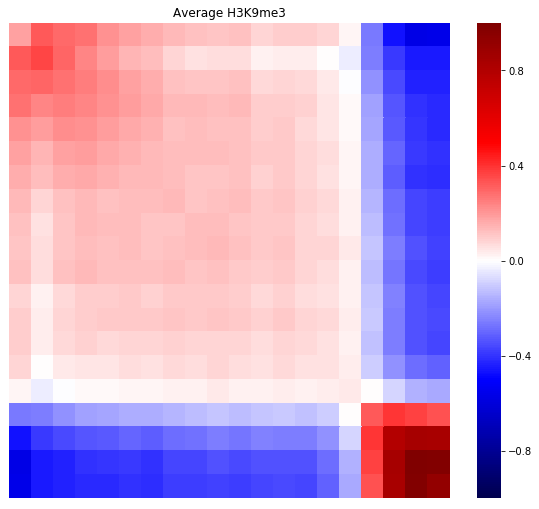

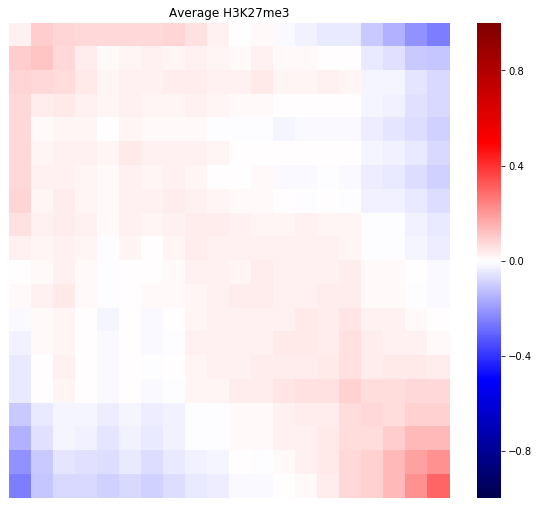

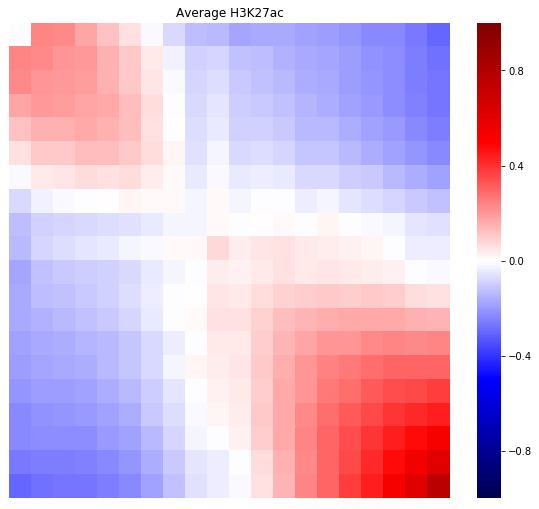

/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr1-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr2-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr3-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr4-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr5-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr6-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr7-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr8-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr9-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr10-distances-min:max-0kb:1000000kb.csv
/Zulu/mike/learneddistances/HCT116-untreated-100kb-chr11-distances-min:max-0kb:

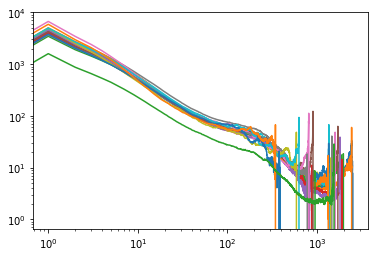

In [6]:
#load in tiles:
filename = "/Zulu/mike/{0}-small:{1}-actual:{2}-{3}".format(celltype,small_resolution,resolution,"wgtiles")

wg_quantiles = pd.read_csv(filename)
#print(wg_quantiles)

tiles = wg_quantiles.shape[0]

mappings = []
mapnames = []
for chrindex in range(chrstart,chrstop):
    mappings.append([])
    for signame in names:
        #mapfileinname = "/Zulu/mike/learnedmaps/{0}-{1}kb-chr{2}-{3}-tiles-learnedmaps-mindist-{4}kb.csv".format(celltype,resolution//1000,chrnames[chrindex],signame,distance_min//1000)
        mapfileinname = "/Zulu/mike/learnedmaps/{0}-{1}kb-chr{2}-{3}-tiles-learnedmaps-min:max-{4}kb:{5}kb.csv".format(celltype,resolution//1000,chrnames[chrindex],signame,distance_min//1000,distance_max//1000)
        mappings[-1].append(pd.read_csv(mapfileinname))
        #print(mapfileinname)

for signame in names:
    mapnames.append(signame+"-tiles")
        
#load in mappings:
ignored = []
for chrindex in range(chrstart,chrstop):
    #load in ignored
    ignorefileinname = "/Zulu/mike/learnedignores/{0}-{1}kb-chr{2}-ignore.csv".format(celltype,resolution//1000,chrnames[chrindex])
    #ignorefileinname = "{0}-{1}kb-chr{2}-ignore.csv".format(celltype,resolution//1000,chrnames[chrindex])

    ignored.append(pd.read_csv(ignorefileinname))
    
    
averagemaps = []
for mapindex in range(len(names)):
    averagemaps.append(mappings[chrstart][mapindex])

for mapindex in range(len(names)):
    for chrindex in range(chrstart+1,chrstop):
        averagemaps[mapindex] = averagemaps[mapindex].add(mappings[chrindex][mapindex],fill_value=0)
        
for mapindex in range(len(names)):
    averagemaps[mapindex] = averagemaps[mapindex]/(chrstop-chrstart)

for m,n in zip(averagemaps,names):
    fig, ax = plt.subplots(figsize=(8,7))
    sns.heatmap(m,cmap='seismic',xticklabels=False,yticklabels=False,annot=False,center=0,vmin=-1,vmax=1)
    ax.xaxis.tick_top()
    plt.tight_layout()
    ax.tick_params(length=0)
    plt.title("Average "+n)
    plt.savefig("/Zulu/mike/figures/{0}/{1}-{2}kb-average-{3}mapheatmap.svg".format(figfold,mapcelltype,resolution//1000,n),format='svg')
    plt.show()
    
#for m,n in zip(mappings,names):
#    fig, ax = plt.subplots(figsize=(8,7))
#    sns.heatmap(m,cmap='seismic',annot=False,center=0,vmin=-1,vmax=1)
#    ax.xaxis.tick_top()
#    plt.tight_layout()
#    ax.tick_params(length=0)
#    plt.title(n)
#    plt.savefig("./figures/{0}-{1}kb-chr{2}-{3}mapheatmap.png".format(mapcelltype,resolution//1000,chrnames[mapindex],n),format='png')
#    plt.show()
#    #sns.heatmap(m, center=0, vmin =-1,vmax=1, cmap="seismic")
#    #plt.title(n)
#    #plt.show()
    
#now load in dists from the right celltype
distances = []
olddistances = []
for chrindex in range(chrstart,chrstop):
    distancefileinname = "/Zulu/mike/learneddistances/{0}-{1}kb-chr{2}-distances-min:max-{3}kb:{4}kb.csv".format(celltype,resolution//1000,chrnames[chrindex],distance_min//1000,distance_max//1000)
    print(distancefileinname)
    distances.append(pd.read_csv(distancefileinname))

#    olddistancefileinname = "/Zulu/mike/learneddistances/{0}-{1}kb-chr{2}-distances.csv".format(celltype,resolution//1000,chrnames[chrindex])
#    print(olddistancefileinname)
#    olddistances.append(pd.read_csv(olddistancefileinname))    
    
    
    
#print(distances)
count = 0

#for d,od in zip(distances,olddistances):
for d in distances:
    print(len(d))
    #print(len(od))
    print(count)
    plt.plot(d)
    count+=1
    #plt.plot(od)
plt.yscale('log')
plt.xscale('log')
plt.show()

    


In [7]:
import pandas as pd
import pyBigWig
import math
from os.path import commonprefix

resolution_ratio = resolution//small_resolution

print(filenames)
#filenames = ["hct116-H3K9me3-ENCFF402WZH.bigWig","hct116-H3K27me3-ENCFF030SYQ.bigWig","hct116-H3K27ac-ENCFF225QAB.bigWig"]
#names = ["H3K9me3","H3K27me3","H3K27ac"]

bigwig_medi_dfs = []
bigwig_mean_dfs = []
#lets make a pandas dataframe
for chrom in chrnames[chrstart:chrstop]:
    print(chrom)
    #chrom = chrnames[chrindex]
    medi_dic = {}
    mean_dic = {}
    lastlength = 0
    for name,filen in zip(names,filenames):
        print("Reading in: {0}".format(name))
        try:
            bw = pyBigWig.open("/Zulu/mike/chips/"+filen)
        except RuntimeError:
            print("Trouble opening {0}".format(filen))
        #print(bw.chroms())
        prefix = commonprefix(bw.chroms().keys())
        #print(prefix)
        #calculate number of 25kb bins
        chromlength = bw.chroms(prefix+chrom)
        print(chromlength)
        binnum = int(math.ceil(chromlength/small_resolution))
        print(binnum)
        smalls = bw.stats(prefix+chrom,nBins=binnum)
        medi_vals = []
        mean_vals = []
        for pos in range(resolution_ratio,binnum,resolution_ratio):
            chunk = np.array(smalls[pos-resolution_ratio:pos], dtype=np.float)
            try:
                medi_vals.append(np.median(chunk))
                mean_vals.append(np.mean(chunk))
            except TypeError:
                print("Error!")
                print(chunk)

        #print(chromlength)
        #print(binnum)
        #print(len(vals))
        #x = small_resolution
        #vals = []
        #while x < chromlength:
            #print(x)
            #vals.extend(bw.stats(prefix+chrom,x-small_resolution,x))
            #x += small_resolution
        #vals.extend(bw.stats(prefix+chrom,x-small_resolution,chromlength))
        #print(bw.stats("chr"+chrom,x-resolution,chromlength))
        medi_vals.extend([0,0,0,0,0])
        mean_vals.extend([0,0,0,0,0])

        if lastlength:
            medi_vals.extend([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
            medi_vals = medi_vals[:lastlength]
            mean_vals.extend([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
            mean_vals = mean_vals[:lastlength]
        lastlength = len(medi_vals)
        #print(len(vals))
        #print(vals[:10])
        medi_dic[name] = medi_vals
        mean_dic[name] = mean_vals
        print("lengths")
        print(len(medi_vals))
        print(len(mean_vals))
        
    bigwig_medi_dfs.append(pd.DataFrame(data=medi_dic).fillna(0))
    bigwig_mean_dfs.append(pd.DataFrame(data=mean_dic).fillna(0))
    
#print(bigwig_medi_df)

['hct116-H3K9me3-ENCFF402WZH.bigWig', 'hct116-H3K27me3-ENCFF030SYQ.bigWig', 'hct116-H3K27ac-ENCFF225QAB.bigWig']
1
Reading in: H3K9me3
249250621
2493
lengths
2497
2497
Reading in: H3K27me3
249250621
2493
lengths
2497
2497
Reading in: H3K27ac
249250621
2493
lengths
2497
2497
2
Reading in: H3K9me3
243199373
2432
lengths
2436
2436
Reading in: H3K27me3
243199373
2432
lengths
2436
2436
Reading in: H3K27ac
243199373
2432
lengths
2436
2436
3
Reading in: H3K9me3
198022430
1981
lengths
1985
1985
Reading in: H3K27me3
198022430
1981
lengths
1985
1985
Reading in: H3K27ac
198022430
1981
lengths
1985
1985
4
Reading in: H3K9me3
191154276
1912
lengths
1916
1916
Reading in: H3K27me3
191154276
1912
lengths
1916
1916
Reading in: H3K27ac
191154276
1912
lengths
1916
1916
5
Reading in: H3K9me3
180915260
1810
lengths
1814
1814
Reading in: H3K27me3
180915260
1810
lengths
1814
1814
Reading in: H3K27ac
180915260
1810
lengths
1814
1814
6
Reading in: H3K9me3
171115067
1712
lengths
1716
1716
Reading in: H3K27me3
1

In [8]:
#ehre we need to double every signal on the X chromosome

if male == True:
    xindex = chrnames.index('X')
    print(xindex)
    print(bigwig_mean_dfs[xindex])
    bigwig_mean_dfs[xindex] = bigwig_mean_dfs[xindex] * 2
    print(bigwig_mean_dfs[xindex])

22
       H3K27ac  H3K27me3   H3K9me3
0     0.028964  0.017820  0.012390
1     0.237775  0.066834  0.077763
2     0.358222  0.082718  0.146778
3     0.480576  0.257519  0.323269
4     0.220281  0.726730  0.314803
5     0.208975  0.569694  0.434278
6     0.233738  0.650104  0.401955
7     0.239733  0.818423  0.354259
8     0.203945  0.634920  0.369524
9     0.265977  0.781709  0.365688
10    0.129735  0.190148  0.139427
11    0.000582  0.006478  0.002261
12    0.138712  0.323244  0.171537
13    0.661961  0.272215  0.257829
14    0.331669  0.269495  0.286143
15    1.176711  0.370862  0.482257
16    0.351303  0.623360  0.332405
17    0.559175  0.289707  0.398359
18    1.062727  0.277628  0.594816
19    0.443309  0.386507  0.532036
20    1.441618  0.280200  0.417506
21    0.400443  0.246930  0.444181
22    0.659929  0.366551  0.523991
23    3.508408  0.300329  0.491059
24    0.698303  0.470538  0.414151
25    1.329433  0.319274  0.429119
26    0.938123  0.387277  0.366176
27    0.223516  0

In [9]:
#now we convert to quantiles
signames = []
for x in range(len(bigwig_mean_dfs)):
    print(bigwig_mean_dfs[x].shape)
    newcolumns = []
    for column in bigwig_mean_dfs[x].iloc[:,-comp_num:]:
        #print(df[column])
        #print(q[column])
        
        newcolumns.append([])
        for r in bigwig_mean_dfs[x][column]:
            place = wg_quantiles[column].searchsorted(r)-1#[0]
            newcolumns[-1].append(place)
        
    for index,column in enumerate(bigwig_mean_dfs[x].iloc[:,:comp_num]):
        bigwig_mean_dfs[x][column+"-tiles"] = pd.Series(newcolumns[index],dtype='int16')
        signames.append(column+"-tiles")
        
for df in bigwig_mean_dfs:
    print(df.shape)

(2497, 3)
(2436, 3)
(1985, 3)
(1916, 3)
(1814, 3)
(1716, 3)
(1596, 3)
(1468, 3)
(1417, 3)
(1360, 3)
(1355, 3)
(1343, 3)
(1156, 3)
(1078, 3)
(1030, 3)
(908, 3)
(816, 3)
(785, 3)
(596, 3)
(635, 3)
(486, 3)
(518, 3)
(1557, 3)
(2497, 6)
(2436, 6)
(1985, 6)
(1916, 6)
(1814, 6)
(1716, 6)
(1596, 6)
(1468, 6)
(1417, 6)
(1360, 6)
(1355, 6)
(1343, 6)
(1156, 6)
(1078, 6)
(1030, 6)
(908, 6)
(816, 6)
(785, 6)
(596, 6)
(635, 6)
(486, 6)
(518, 6)
(1557, 6)


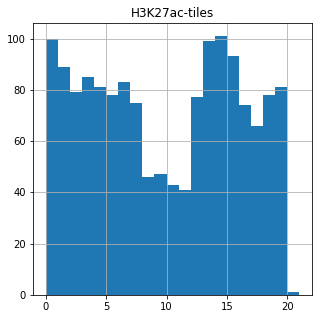

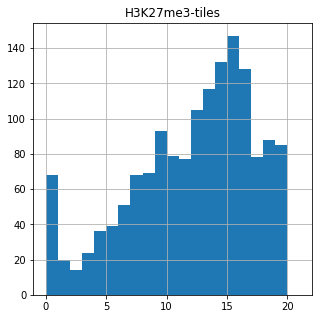

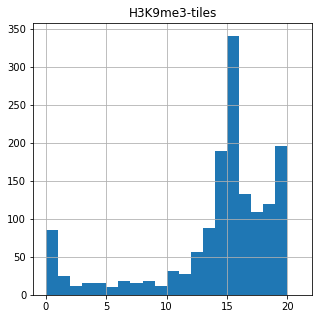

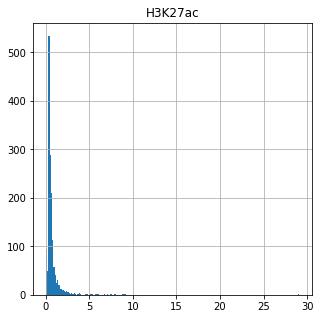

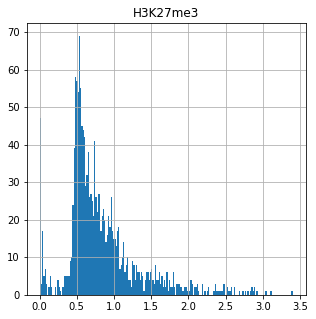

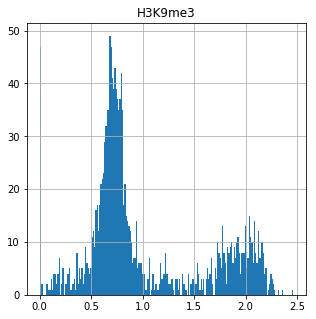

In [10]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (5,5)
for col in bigwig_mean_dfs[0].iloc[:,-comp_num:]:
    df.hist(col,bins=range(tiles+1))
    plt.show()
    
for col in bigwig_mean_dfs[0].iloc[:,:comp_num]:
    df.hist(col,bins=200)
    plt.show()

In [11]:
print(len(bigwig_mean_dfs))
print(len(ignored))

for df in bigwig_mean_dfs:
    print(df.columns)
    print(df.shape)

23
23
Index(['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K27ac-tiles', 'H3K27me3-tiles',
       'H3K9me3-tiles'],
      dtype='object')
(2497, 6)
Index(['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K27ac-tiles', 'H3K27me3-tiles',
       'H3K9me3-tiles'],
      dtype='object')
(2436, 6)
Index(['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K27ac-tiles', 'H3K27me3-tiles',
       'H3K9me3-tiles'],
      dtype='object')
(1985, 6)
Index(['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K27ac-tiles', 'H3K27me3-tiles',
       'H3K9me3-tiles'],
      dtype='object')
(1916, 6)
Index(['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K27ac-tiles', 'H3K27me3-tiles',
       'H3K9me3-tiles'],
      dtype='object')
(1814, 6)
Index(['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K27ac-tiles', 'H3K27me3-tiles',
       'H3K9me3-tiles'],
      dtype='object')
(1716, 6)
Index(['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K27ac-tiles', 'H3K27me3-tiles',
       'H3K9me3-tiles'],
      dtype='object')
(1596, 6)
Index(['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K27ac-tiles', 'H3K2

In [12]:
for x in range(len(bigwig_mean_dfs)):
    print(x)
    print(len(ignored[x]))
    #print(z_embed_df)
    print(bigwig_mean_dfs[x].shape)

    #shorten to match ignorebins length
    bigwig_mean_dfs[x] = bigwig_mean_dfs[x].drop(bigwig_mean_dfs[x].index[len(ignored[x]):])

    print(bigwig_mean_dfs[x].shape)
    
    #here we don't want to shorten, we just want to replace with nans
    #so we don't even need to do that here, we can do it later.
    #nan_ignore_matrix[ignorebins,:] = np.nan
    #nan_ignore_matrix[:,ignorebins] = np.nan
    
    
    #bigwig_mean_df_cc = bigwig_mean_df[~np.array(ignorebins)]

    #bigwig_mean_df_cc.reset_index(inplace=True)

    #print(bigwig_mean_df_cc)

    #mean_df =  pd.DataFrame(bigwig_mean_df_cc)

    #print(mean_df)

0
2494
(2497, 6)
(2494, 6)
1
2433
(2436, 6)
(2433, 6)
2
1982
(1985, 6)
(1982, 6)
3
1913
(1916, 6)
(1913, 6)
4
1811
(1814, 6)
(1811, 6)
5
1713
(1716, 6)
(1713, 6)
6
1593
(1596, 6)
(1593, 6)
7
1465
(1468, 6)
(1465, 6)
8
1414
(1417, 6)
(1414, 6)
9
1357
(1360, 6)
(1357, 6)
10
1352
(1355, 6)
(1352, 6)
11
1340
(1343, 6)
(1340, 6)
12
1153
(1156, 6)
(1153, 6)
13
1075
(1078, 6)
(1075, 6)
14
1027
(1030, 6)
(1027, 6)
15
905
(908, 6)
(905, 6)
16
813
(816, 6)
(813, 6)
17
782
(785, 6)
(782, 6)
18
593
(596, 6)
(593, 6)
19
632
(635, 6)
(632, 6)
20
483
(486, 6)
(483, 6)
21
515
(518, 6)
(515, 6)
22
1554
(1557, 6)
(1554, 6)


In [13]:
def averagemaps(mappings,names):
    averagemaps = []
    for nameindex in range(len(names)):
        averagemaps.append(mappings[0][nameindex])

    for nameindex in range(len(names)):
        for mapset in mappings[1:]:
            averagemaps[nameindex] = averagemaps[nameindex].add(mapset[nameindex])

    for nameindex in range(len(names)):
        averagemaps[nameindex] = averagemaps[nameindex]/(len(mappings))
        
    return averagemaps

In [14]:
def mapping(maps,sig1,sig2):
    total = 1
    for m,i,j in zip(maps,sig1,sig2):
        try:
            total += m.at[i,str(j)]
        except KeyError:
            return np.nan
    return total

In [15]:
#now load in observed:
observeds = []
for chrindex in range(chrstart,chrstop):
    print(chrindex)
    chrindex = chrindex - chrstart
    sizebins = len(ignored[chrindex])
    chrom = chrnames[chrindex]
    interactions = open(hic_directory+hic_prefix+chrom+"_"+chrom+"_"+str(resolution)+".txt",'r')
        
    observed = np.zeros((sizebins,sizebins))
    
    
    for line in interactions:
        li = line.split()
        left = int(li[0])//resolution
        right = int(li[1])//resolution
        score = float(li[2])
        observed[left][right] = score
    observeds.append(np.copy(observed))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [16]:
print(distances[0].shape)
print(sizebins)

(2494, 1)
1554


In [17]:
import matplotlib
import matplotlib.gridspec as grd
matplotlib.rcParams['figure.figsize'] = (16,16)

import matplotlib.gridspec as grd
from matplotlib.colors import LinearSegmentedColormap
#create a juicebox-like red to white colormap
br = LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)])

from scipy import stats

expecteds = []
distonlys = []
individuals = []

for chrindex in range(chrstart,chrstop):
    corrindex = chrindex - chrstart
    sizebins = len(ignored[corrindex])
    print(sizebins)
    chrom = chrnames[chrindex]
    print("Loading: {0} vs {1}".format(chrom,chrom))
    
    maps = averagemaps(mappings[:chrindex]+mappings[chrindex+1:],names)
    #dists = distances[corrindex]
    dists = distances[corrindex]
    sigs = np.array(bigwig_mean_dfs[corrindex][mapnames])
    print(len(sigs))
    ignor = ignored[corrindex]
    #print(mappings)
    #print(sigs.dtype)
    
    observed = observeds[corrindex]
    expected = np.zeros((sizebins,sizebins))
    distonly = np.zeros((sizebins,sizebins))
    indivs = []
    for n in range(comp_num):
        indivs.append(np.zeros((sizebins,sizebins)))
    for i in range(0,sizebins):
        #print(i)
        for j in range(min(i,sizebins),sizebins):
            #print(ignor.at[i,'0'])
            if ignor.at[i,'0'] or ignor.at[j,'0']:
                if ignor.at[i,'0']:
                    observed[i,:] = np.nan
                    expected[i,:] = np.nan
                if ignor.at[j,'0']:
                    observed[:,j] = np.nan
                    expected[:,j] = np.nan
                continue
            #distindex = distance_indices[j-i]
            distfactor = dists.iloc[j-i,0]
            #expected[i,j] = np.random.poisson(max(0,bias[i]*bias[j]*distfactor*ncomp_scales_term(comps[i],comps[j],scalefactors)))
            #print(maps)
            #print(sigs[i])
            #print(sigs[j])
            
            expected[i,j] = distfactor*mapping(maps,sigs[i],sigs[j])
            #expected[i,j] = np.random.poisson(max(0,distfactor*mapping(maps,sigs[i],sigs[j])))
            #expected[i,j] = -1 + mapping(maps[csig:csig+1],sigs[i][0:csig]+sigs[i][csig+1:cnum],sigs[j][0:csig]+sigs[j][csig+1:cnum])
            #expected[i,j] = math.log(distfactor)

            expected[j,i] = observed[i,j]
            
            distonly[i,j] = distfactor*1
            distonly[j,i] = observed[i,j]
            
            for c in range(comp_num):
                indivs[c][i,j] = distfactor*mapping([maps[c]],[sigs[i][c]],[sigs[j][c]])
                indivs[c][j,i] = observed[i,j]
            
    
    expecteds.append(np.copy(expected))
    distonlys.append(np.copy(distonly))
    individuals.append(np.copy([np.copy(i) for i in indivs]))

2494
Loading: 1 vs 1
2494
2433
Loading: 2 vs 2
2433
1982
Loading: 3 vs 3
1982
1913
Loading: 4 vs 4
1913
1811
Loading: 5 vs 5
1811
1713
Loading: 6 vs 6
1713
1593
Loading: 7 vs 7
1593
1465
Loading: 8 vs 8
1465
1414
Loading: 9 vs 9
1414
1357
Loading: 10 vs 10
1357
1352
Loading: 11 vs 11
1352
1340
Loading: 12 vs 12
1340
1153
Loading: 13 vs 13
1153
1075
Loading: 14 vs 14
1075


KeyboardInterrupt: 

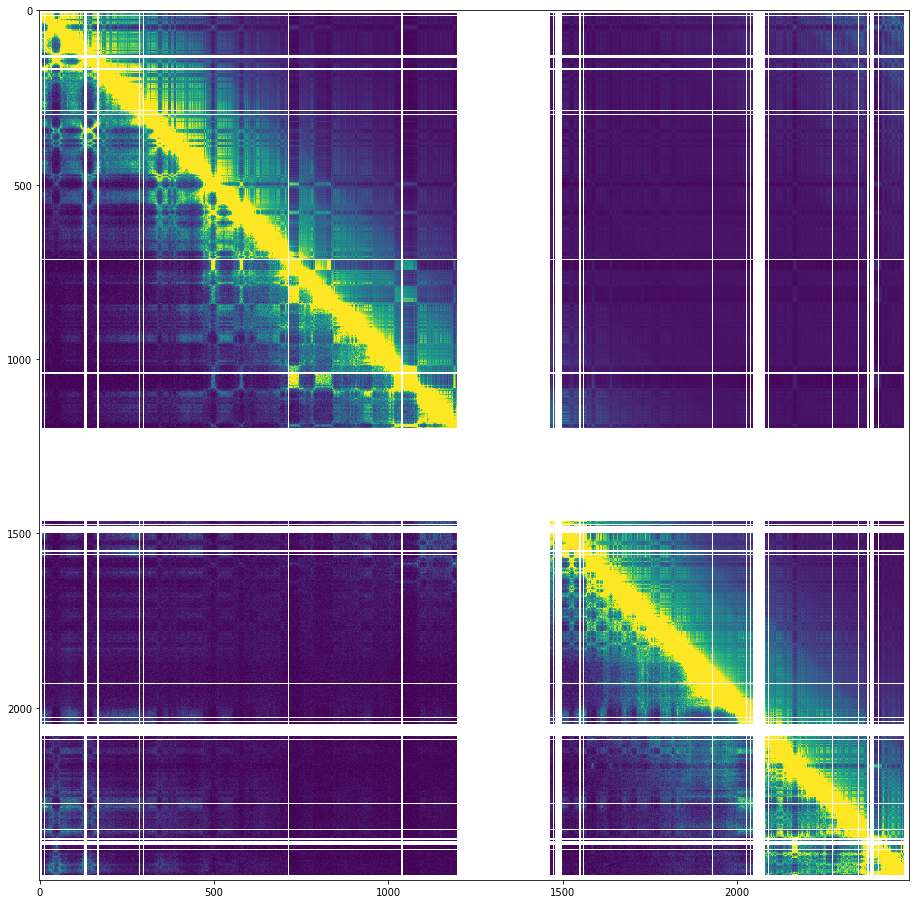

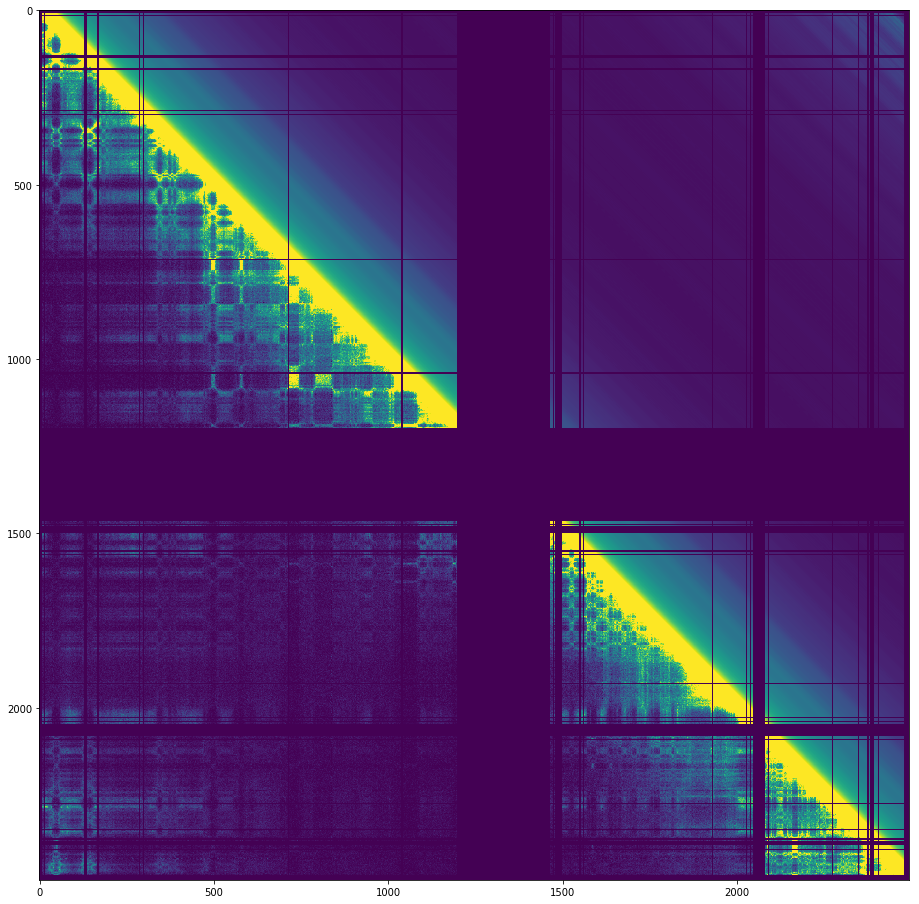

In [18]:
plt.imshow(expecteds[0],vmin = 0,vmax=100)
plt.show()
plt.imshow(distonlys[0],vmin = 0,vmax=100)
plt.show()

/Zulu/mike/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/Zulu/mike/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


1908
[462, 920, 1418]
['50 Mb', '100 Mb', '150 Mb']


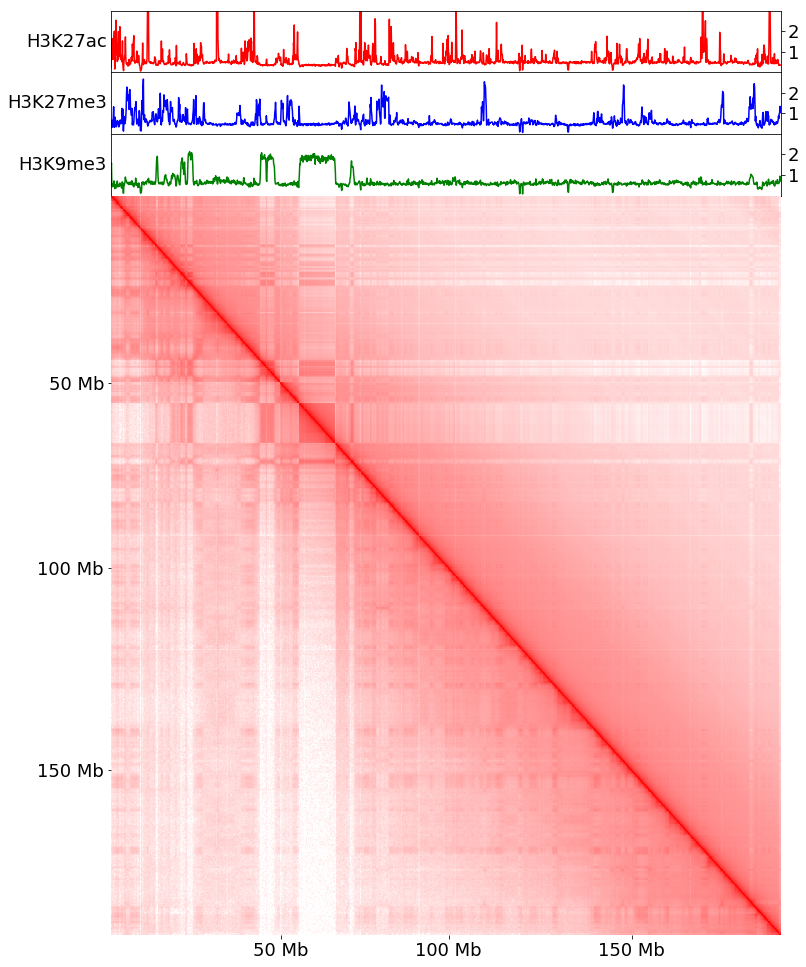

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/Zulu/mike/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Zulu/mike/.local/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Zulu/mike/.local/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Zulu/mike/.local/lib/python3.5/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=Fals

          Expected  Observed
Expected  1.000000  0.945688
Observed  0.945688  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.546549
Observed-Z    0.546549    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.964647
Observed            0.964647  1.000000
1805
[459, 936, 1424]
['50 Mb', '100 Mb', '150 Mb']


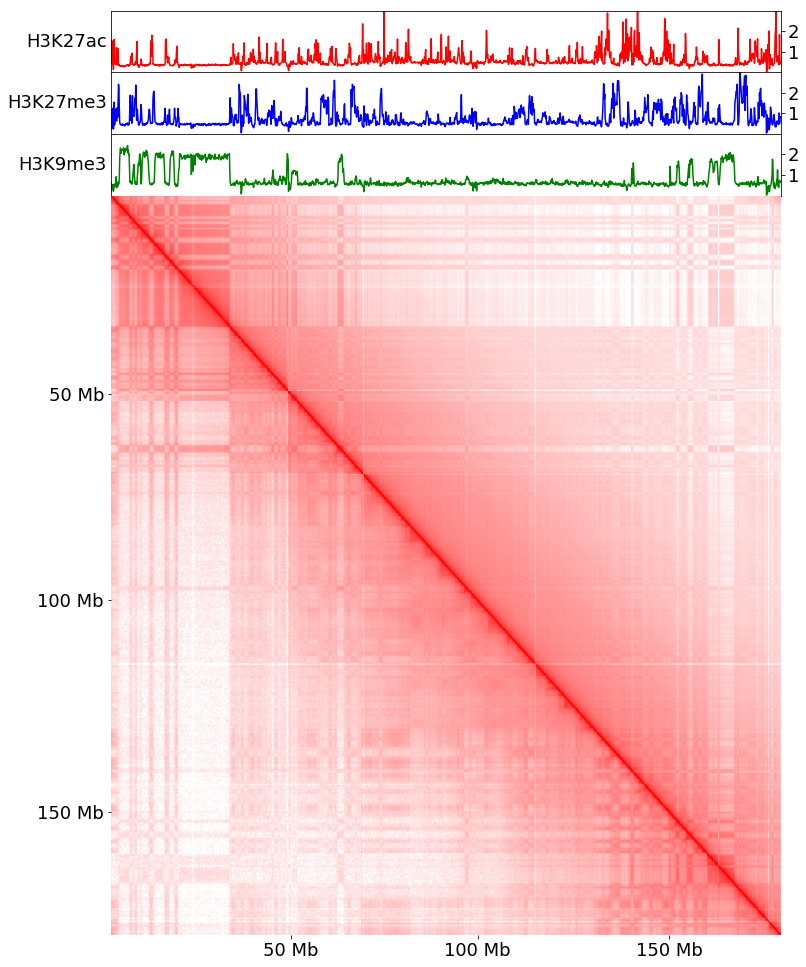

          Expected  Observed
Expected  1.000000  0.925372
Observed  0.925372  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.548298
Observed-Z    0.548298    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.959876
Observed            0.959876  1.000000
1708
[496, 931, 1430]
['50 Mb', '100 Mb', '150 Mb']


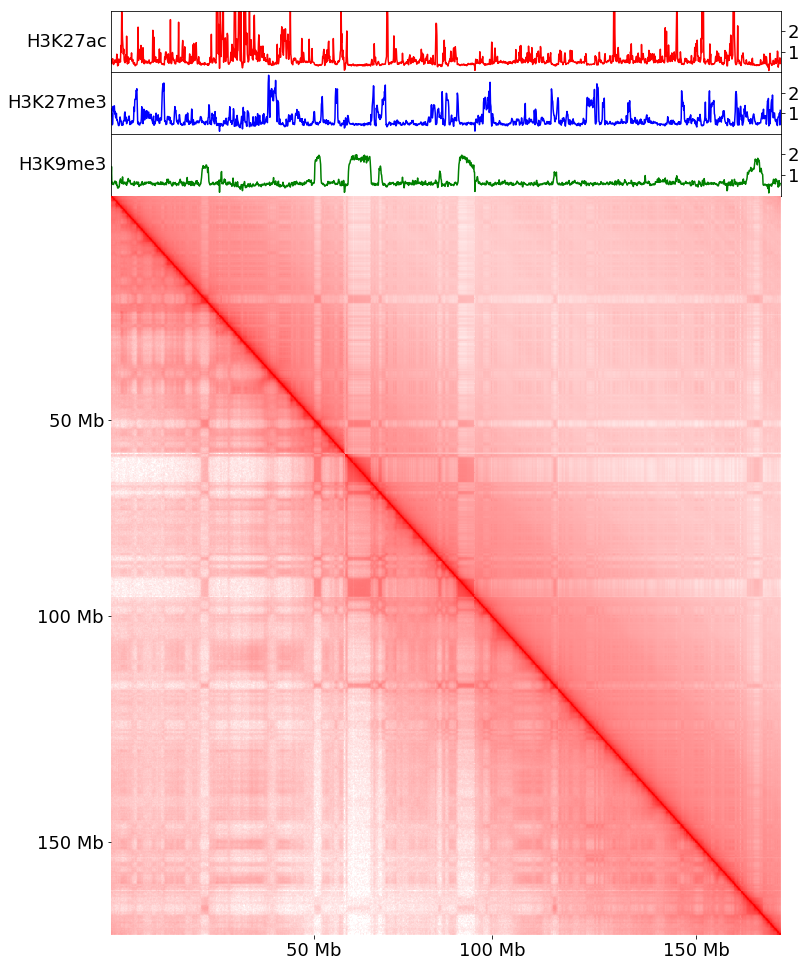

          Expected  Observed
Expected  1.000000  0.944189
Observed  0.944189  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.533533
Observed-Z    0.533533    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.959312
Observed            0.959312  1.000000
1590
[498, 900, 1391]
['50 Mb', '100 Mb', '150 Mb']


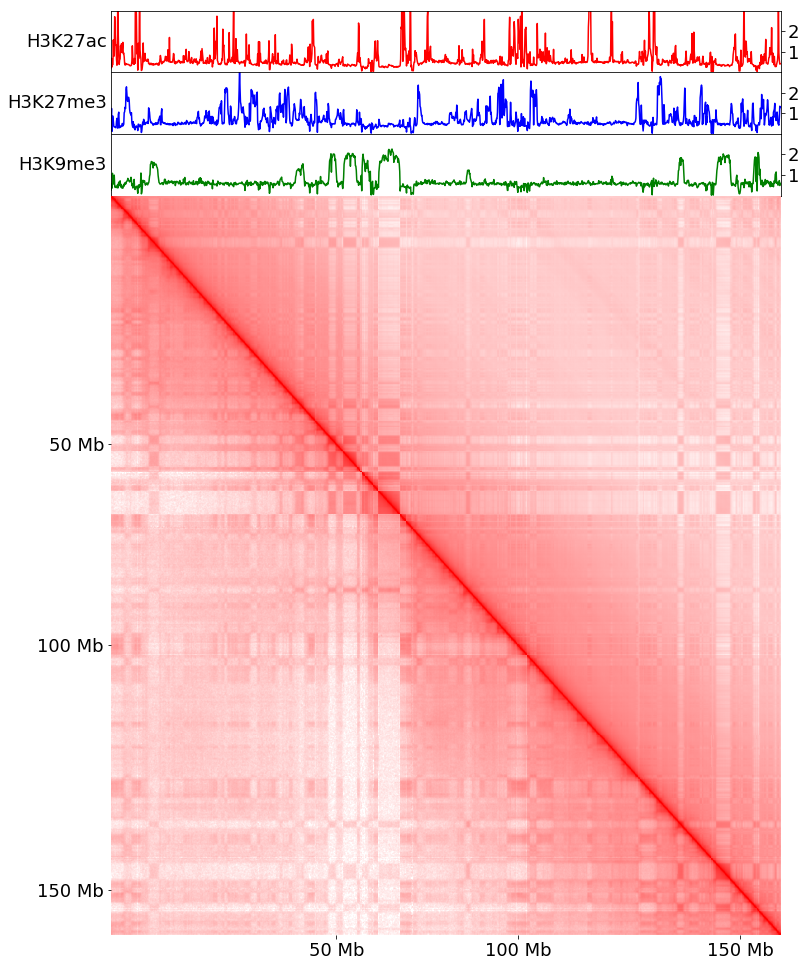

          Expected  Observed
Expected  1.000000  0.944233
Observed  0.944233  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.559047
Observed-Z    0.559047    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.960567
Observed            0.960567  1.000000
1462
[448, 945]
['50 Mb', '100 Mb']


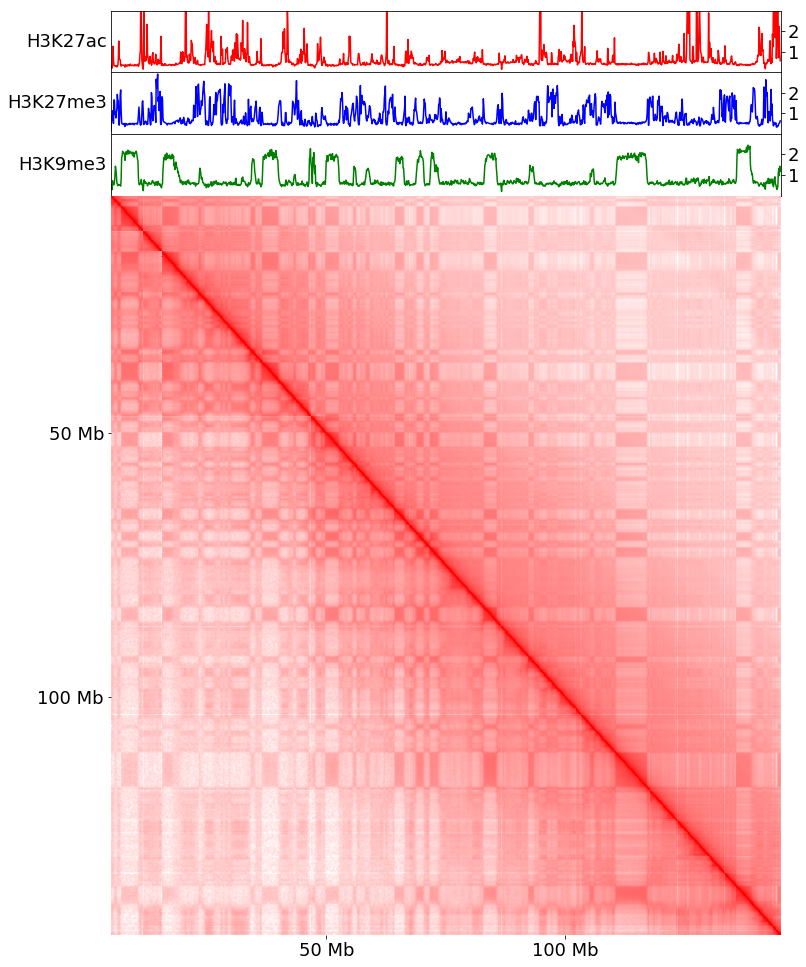

          Expected  Observed
Expected  1.000000  0.931998
Observed  0.931998  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.665084
Observed-Z    0.665084    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.955767
Observed            0.955767  1.000000
1410
[382, 657]
['50 Mb', '100 Mb']


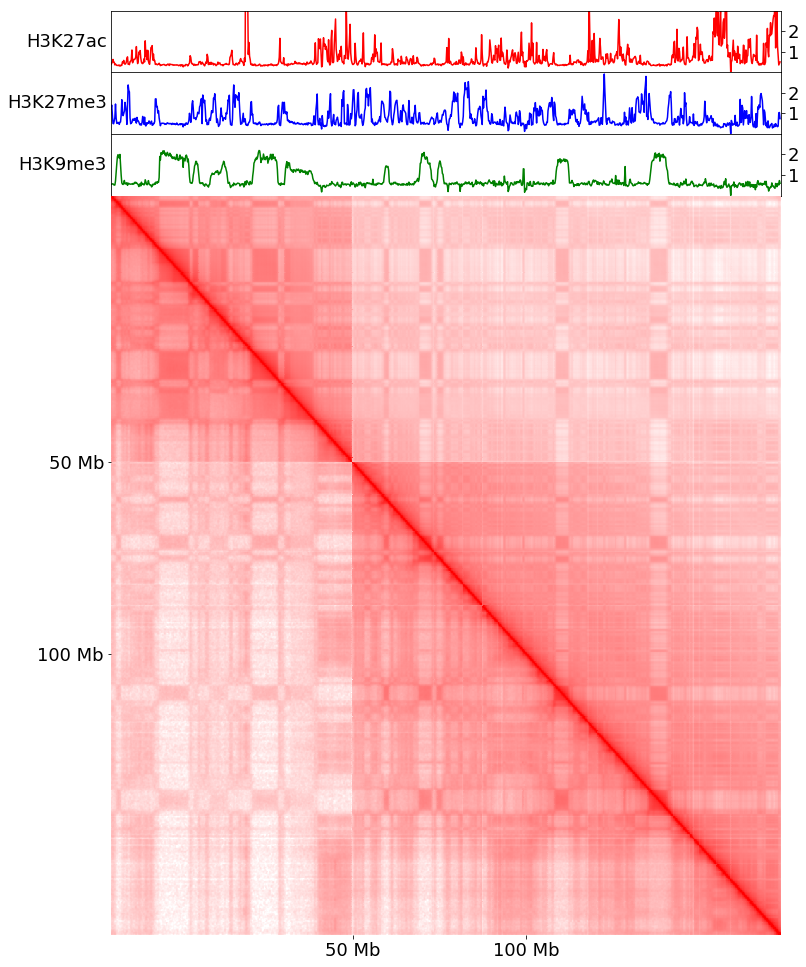

          Expected  Observed
Expected  1.000000  0.933241
Observed  0.933241  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.638151
Observed-Z    0.638151    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.957452
Observed            0.957452  1.000000
1353
[425, 914]
['50 Mb', '100 Mb']


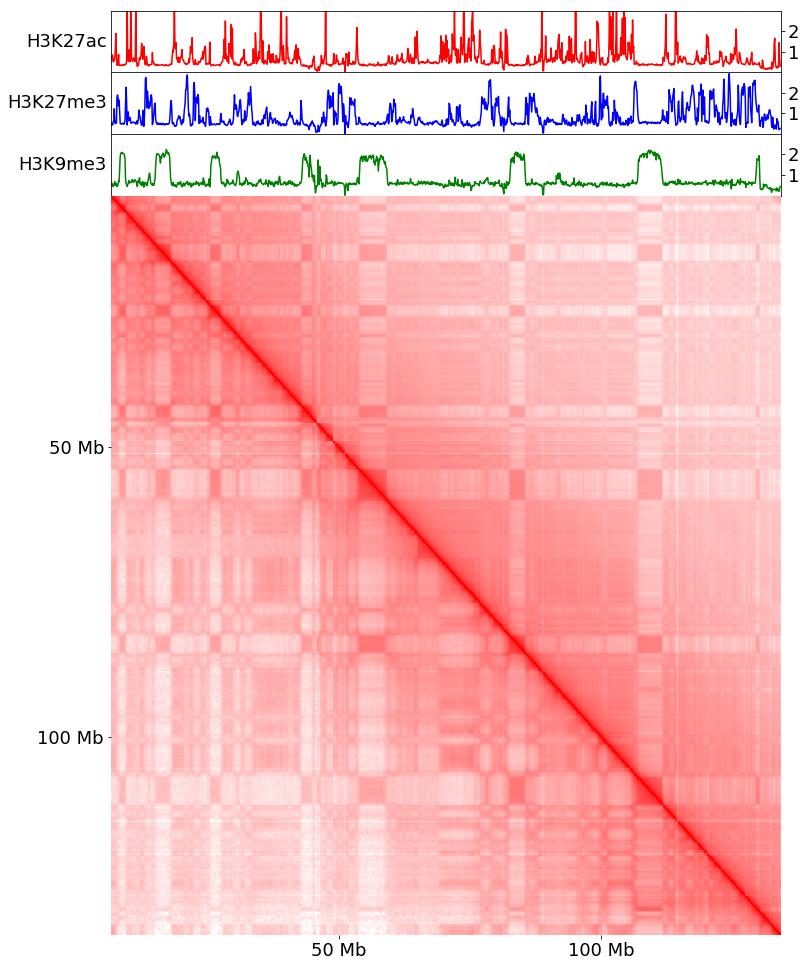

          Expected  Observed
Expected  1.000000  0.936572
Observed  0.936572  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.612212
Observed-Z    0.612212    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.959816
Observed            0.959816  1.000000
1349
[487, 915]
['50 Mb', '100 Mb']


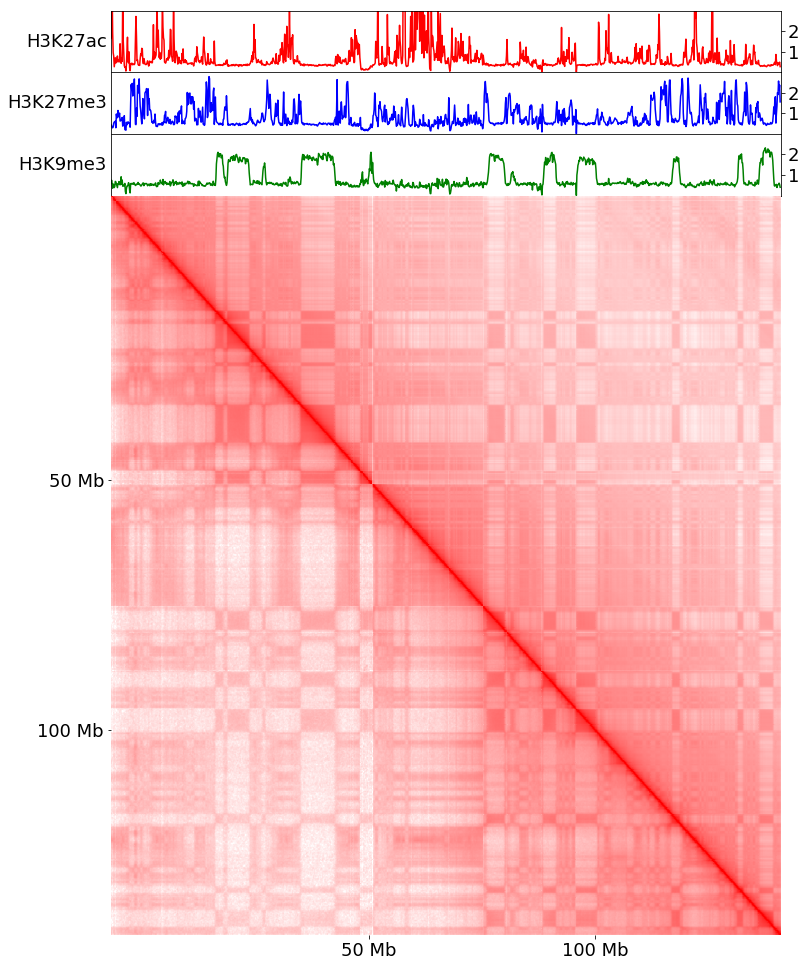

          Expected  Observed
Expected  1.000000  0.925167
Observed  0.925167  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.597885
Observed-Z    0.597885    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.955185
Observed            0.955185  1.000000
1334
[450, 939]
['50 Mb', '100 Mb']


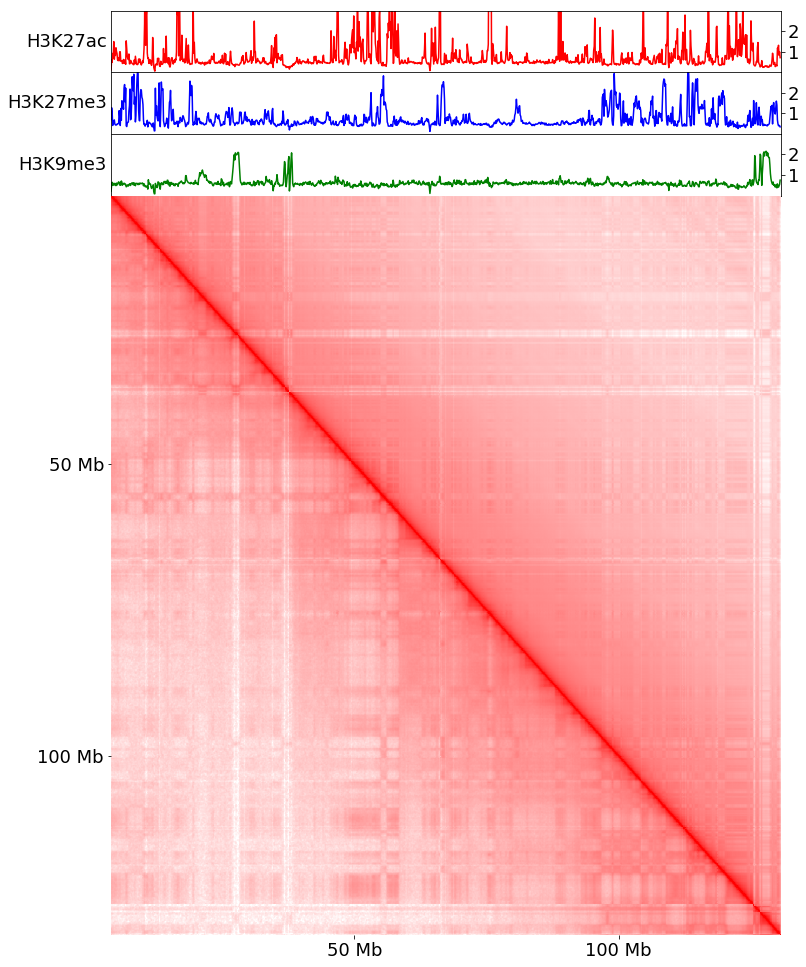

          Expected  Observed
Expected  1.000000  0.953346
Observed  0.953346  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.455432
Observed-Z    0.455432    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.959181
Observed            0.959181  1.000000
1150
[299, 797]
['50 Mb', '100 Mb']


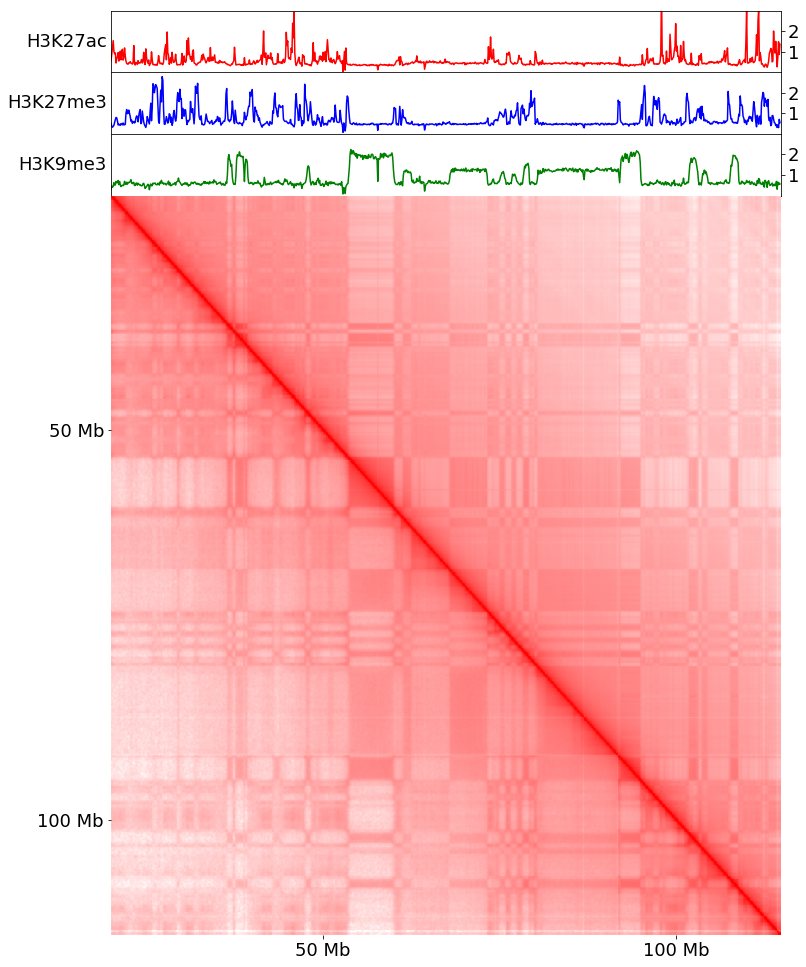

          Expected  Observed
Expected  1.000000  0.937755
Observed  0.937755  1.000000
            Expected-Z  Observed-Z
Expected-Z    1.000000    0.687388
Observed-Z    0.687388    1.000000
               Distance Only  Observed
Distance Only       1.000000  0.956762
Observed            0.956762  1.000000


IndexError: list index out of range

In [19]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # transparent white   with alpha = 30%
    #"axes.facecolor":    (0.0, 1.0, 0.0, 0.5),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # blue  with alpha = 20%
})

matplotlib.rc('font', **font)

from scipy.ndimage.filters import gaussian_filter
import sklearn.metrics
import scipy.stats

from matplotlib.colors import LinearSegmentedColormap
#create a juicebox-like red to white colormap
br = LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)])

correlationout= "/Zulu/mike/accuracy/{0}:mappedwith-{1}-avgallbutself:{2}kb-pearson.txt".format(celltype,
                                                                               mapcelltype,resolution//1000)
corrout = open(correlationout,'w')
corrout.write("\t".join(["Chr","Correlation","Z-Correlation","Distance Correlation"])+"\n")
chrstart=3
for chrindex in range(chrstart,chrstop):
    cutoff=0
    ticks = list(range(cutoff,len(expecteds[chrindex])))
    labels = [str(int(t/10))+" Mb" for t in ticks]
    smooth_exp = gaussian_filter(np.nan_to_num(expecteds[chrindex]), sigma=1)
    log_exp_df = pd.DataFrame(np.nan_to_num(np.log(smooth_exp)))#,index=labels,columns=labels)
    #log_exp_df = pd.DataFrame(np.nan_to_num(np.log(expecteds[chrindex])))#,index=labels,columns=labels)
    log_exp_df[np.isneginf(log_exp_df)] = 0
    exp_df = pd.DataFrame(expecteds[chrindex])
    log_dist_df = pd.DataFrame(np.nan_to_num(np.log(distonlys[chrindex])))
    dist_df = pd.DataFrame(distonlys[chrindex])
    #smooth_obs = gaussian_filter(observeds[chrindex], sigma=1)
    #smoo_obs_df = pd.DataFrame(np.log(smooth_obs),index=labels,columns=labels)
    
    #here now we drop ignored bins from the dataframe
    ignor = ignored[chrindex]
    #print(ignor)
    #print(ignor)
    
    igno = ignor.index[ignor.iloc[:,0]].tolist()
    #print(igno)
    #print(smoo_exp_df)
    #igno = ignor.index[ignor.iloc[:,0] == True].tolist()
    log_exp_df_c = log_exp_df.drop(igno,axis=0)
    log_exp_df_cc = log_exp_df_c.drop(igno,axis=1)
    exp_df_c = exp_df.drop(igno,axis=0)
    exp_df_cc = exp_df_c.drop(igno,axis=1)
    log_dist_df_c = log_dist_df.drop(igno,axis=0)
    log_dist_df_cc = log_dist_df_c.drop(igno,axis=1)
    dist_df_c = dist_df.drop(igno,axis=0)
    dist_df_cc = dist_df_c.drop(igno,axis=1)
    
    labeldict = {}
    for c in log_exp_df_cc.columns:
        labeldict[c] = "{0} Mb".format(c/(1000000//resolution))
    

    #print(log_exp_df_cc)
    
    
    #smoo_exp_df_cc.rename(index=labeldict,columns=labeldict,inplace=True)
    #print(smoo_exp_df_cc)
    
    bigwig_mean_df = bigwig_mean_dfs[chrindex].drop(igno,axis=0).reset_index()

    fig = plt.figure(figsize=(12,17))
    gs = grd.GridSpec(4, 1, height_ratios=[1,1,1,12],wspace=0, hspace=0)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1],sharex=ax0)
    ax2 = plt.subplot(gs[2],sharex=ax0)
    ax3 = plt.subplot(gs[3],sharex=ax0)
    #ax4 = plt.subplot(gs[4],sharex=ax0)
    #ax5 = plt.subplot(gs[5],sharex=ax0)
    #ax3 = plt.subplot(gs[2],sharex=ax1)
    #plt.title("Chromosome " + chrom + ":" + "all")
    #ax1.plot(np.array(sigs)[lower:upper,:])
    ax0.plot(bigwig_mean_df['H3K27ac'],'r')
    ax0.set_ylim([0,3])
    ax0.set_yticks([1,2])
    ax0.set_xticks([])
    ax0.yaxis.tick_right()
    ax0.set_ylabel('H3K27ac', rotation='horizontal', ha='right',va="center")
    ax0.patch.set_facecolor('w')
    plt.setp(ax0.get_xticklabels(), visible=False)
    ax1.plot(bigwig_mean_df['H3K27me3'],'b')
    ax1.set_ylim([0,3])
    ax1.set_yticks([1,2])
    ax1.yaxis.tick_right()
    ax1.set_ylabel('H3K27me3', rotation='horizontal', ha='right',va="center")
    ax1.patch.set_facecolor('w')
    plt.setp(ax1.get_xticklabels(), visible=False)
    #ax2.plot(bigwig_mean_df['H3K9me2'],'m')
    #ax2.set_ylim([0,3])
    #plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.plot(bigwig_mean_df['H3K9me3'],'g')
    ax2.set_ylim([0,3])
    ax2.set_yticks([1,2])
    ax2.set_xticks([])
    ax2.yaxis.tick_right()
    ax2.set_ylabel('H3K9me3', rotation='horizontal', ha='right',va="center")
    ax2.set_facecolor('w')
    plt.setp(ax2.get_xticklabels(), visible=False)

    #print(ticks)
    #print(labels)
    ax3 = sns.heatmap(log_exp_df_cc,xticklabels=False,yticklabels=False,ax=ax3,cbar=False,cmap=br,vmin=0,vmax=9,rasterized=True,
                     cbar_kws = dict(use_gridspec=False,ticks=[0,3,6,9],shrink=0.5,aspect=10,location="bottom"))
    plt.yticks(rotation=0) 
    #plt.setp(ax5.yaxis.get_majorticklabels(), va="center" )

    tickoffsets = 25000000
    if chrindex == 18:
        tickoffsets= 10000000
    tickmulti = int(tickoffsets/resolution)*2

    end = log_exp_df_cc.index.values.tolist()[-1]
    print(end)
    start = int(np.ceil((cutoff+1)/tickmulti)*tickmulti)



    ticks = []
    labels = []
    for x in range(start,end,tickmulti):
        #this gets the index of the right name
        try:
            i = log_exp_df_cc.index.get_loc(x)
        except KeyError:
            #here now we want to find the proper location and put the tick there
            i = log_exp_df_cc.index.searchsorted(x)
        #print(smoo_exp_df_cc.iloc[i-2:i+2,i-2:i+2])
        ticks.append(i)
        labels.append("{0} Mb".format(int(x/(1000000//resolution))))

    print(ticks)
    print(labels)

    plt.xticks(ticks,labels)
    plt.yticks(ticks,labels)
    #plt.savefig("./figures/{0}-Chr{1}:{2}.png".format(celltype,chrom1,cutoff),format='png')
    plt.savefig("/Zulu/mike/figures/{0}-sims/{0}-Chr{1}:mappedwith-{2}-avgallbutself:{3}kb.svg".format(celltype,chrnames[chrindex],mapcelltype,resolution//1000),format='svg')
    plt.show()
    """
    SStots = []
    SSress = []
    R2s = []
    skR2s = []
    skR2sz = []
    pearsons = []
    spearmans = []
    distpearsons =[]
    #1+distance_min_bins
    for d in range(1+distance_min_bins,len(expecteds[chrindex])-500):
        o = np.diag(expecteds[chrindex],d*-1)
        e = np.diag(expecteds[chrindex],d)
        dis = np.diag(distonlys[chrindex],d)
        oz = stats.zscore(o,nan_policy='omit')
        ez = stats.zscore(e,nan_policy='omit')
        #print(len(oz))
        #print(len(ez))
        dis = dis[o==o]
        o = o[o==o]
        e = e[e==e]
        oz = oz[oz==oz]
        ez = ez[ez==ez]
        #print(len(oz))
        #print(len(ez))
        SStot = np.sum((oz - np.mean(oz))**2)
        SSres = np.sum((oz-ez)**2)
        R2 = 1 - (SSres/SStot)
        SStots.append(SStot)
        SSress.append(SSres)
        R2s.append(R2)
        pearsons.append(np.corrcoef(o,e)[0,1])
        skR2s.append(sklearn.metrics.r2_score(o,e))
        skR2sz.append(sklearn.metrics.r2_score(oz,ez))
        spearmans.append(stats.spearmanr(o,e)[0])
        #print(np.corrcoef(o,dis)[0,1])
        distpearsons.append(np.corrcoef(o,dis)[0,1])
    """    
    #plt.plot(skR2s)
    #plt.plot(skR2sz,label='R^2')
    #plt.ylim(-1,1)
    #plt.plot(pearsons,label='Pearson')
    #plt.plot(distpearsons,label='Distance Only Pearson')
    #plt.legend()
    #plt.show()
    
    #oedf = pd.DataFrame({'Expected' : np.triu(smoo_exp_df_cc.to_numpy(),1).flatten(), 
    #                     'Observed' : np.tril(smoo_exp_df_cc.to_numpy(),-1).transpose().flatten()})
    
    #print(oedf)
    #print("Triangle Pearson")
    #print(oedf.corr())
    
    obs = []
    exp = []
    zobs = []
    zexp = []
    dist = []
    for d in range(1+distance_min_bins,len(expecteds[chrindex])):
        #exp.extend(np.diag(log_exp_df_cc,d))
        #obs.extend(np.diag(log_exp_df_cc,d*-1))
        #dist.extend(np.diag(log_dist_df_cc,d))
        exp.extend(np.diag(exp_df_cc,d))
        obs.extend(np.diag(exp_df_cc,d*-1))
        dist.extend(np.diag(dist_df_cc,d))
        zexp.extend(stats.zscore(np.diag(exp_df_cc,d),nan_policy='omit'))
        zobs.extend(stats.zscore(np.diag(exp_df_cc,d*-1),nan_policy='omit'))
        
    oedf = pd.DataFrame({'Expected' : exp, 'Observed' : obs})
    oecorr = oedf.corr()
    print(oecorr)
    zoedf = pd.DataFrame({'Expected-Z' : zexp, 'Observed-Z' : zobs})
    zoecorr = zoedf.corr()
    print(zoecorr)
    ddf = pd.DataFrame({'Distance Only' : dist, 'Observed' : obs})
    dcorr = ddf.corr()
    print(dcorr)
    
    #oedf.plot.scatter(x='Observed',y='Expected')
    #plt.xlim(-2,10)
    #plt.ylim(-2,10)
    #plt.show()
    #zoedf.plot.scatter(x='Observed-Z',y='Expected-Z')
    #plt.xlim(-4,10)
    #plt.ylim(-4,10)
    #plt.show()
    #ddf.plot.scatter(x='Observed',y='Distance Only')
    #plt.xlim(0,10)
    #plt.ylim(0,10)
    #plt.show()
    
    corrout.write("\t".join([chrnames[chrindex],str(oecorr.iat[0,1]),str(zoecorr.iat[0,1]),str(dcorr.iat[0,1])])+"\n")
        
    
corrout.close()

In [ ]:
print(len(individuals[0][0]))
print(len(individuals[1][0]))
plt.imshow(individuals[0][0],vmin=0,vmax=100)
plt.show()
plt.imshow(individuals[2][1],vmin=0,vmax=100)
plt.show()

In [ ]:
#plot individuals
color_dict = {'Gro':'m','H3K27ac':'r','H3K27me3':'b','H3K9me3':'g'}


for chrindex in range(chrstart,chrstop):
    indivs = individuals[chrindex]
    #here now we drop ignored bins from the dataframe
    ignor = ignored[chrindex]
    #print(ignor)
    igno = ignor.index[ignor.iloc[:,0]].tolist()
    #print(igno)
    cname = chrnames[chrindex]
    for c in range(comp_num):
        #plt.imshow(indivs[c],vmin=0,vmax=100)
        #plt.show()
        
        name = names[c]
        print(cname +" : " + name)
        cutoff=0
        ticks = list(range(cutoff,len(indivs[c])))
        labels = [str(int(t/10))+" Mb" for t in ticks]
        smooth_ind = gaussian_filter(np.nan_to_num(indivs[c]), sigma=1)
        log_ind_df = pd.DataFrame(np.nan_to_num(np.log(smooth_ind)))#,index=labels,columns=labels)
        log_ind_df[np.isneginf(log_exp_df)] = 0
        ind_df = pd.DataFrame(indivs[c])
        #log_dist_df = pd.DataFrame(np.nan_to_num(np.log(distonlys[chrindex])))
        #dist_df = pd.DataFrame(distonlys[chrindex])
        #smooth_obs = gaussian_filter(observeds[chrindex], sigma=1)
        #smoo_obs_df = pd.DataFrame(np.log(smooth_obs),index=labels,columns=labels)
        #print(igno)
        #print(smoo_exp_df)
        #igno = ignor.index[ignor.iloc[:,0] == True].tolist()
        log_ind_df_c = log_ind_df.drop(igno,axis=0)
        log_ind_df_cc = log_ind_df_c.drop(igno,axis=1)
        ind_df_c = ind_df.drop(igno,axis=0)
        ind_df_cc = ind_df_c.drop(igno,axis=1)
        #log_dist_df_c = log_dist_df.drop(igno,axis=0)
        #log_dist_df_cc = log_dist_df_c.drop(igno,axis=1)
        #dist_df_c = dist_df.drop(igno,axis=0)
        #dist_df_cc = dist_df_c.drop(igno,axis=1)

        labeldict = {}
        for c in log_ind_df_cc.columns:
            labeldict[c] = "{0} Mb".format(c/(1000000//resolution))

        #print(log_exp_df_cc)
        
        
        bigwig_mean_df = bigwig_mean_dfs[chrindex].drop(igno,axis=0).reset_index()

        fig = plt.figure(figsize=(12,13))
        gs = grd.GridSpec(2, 1, height_ratios=[1,12],wspace=0, hspace=0)
        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[1],sharex=ax0)
        #ax4 = plt.subplot(gs[4],sharex=ax0)
        #ax5 = plt.subplot(gs[5],sharex=ax0)
        #ax3 = plt.subplot(gs[2],sharex=ax1)
        #plt.title("Chromosome " + chrom + ":" + "all")
        #ax1.plot(np.array(sigs)[lower:upper,:])
        ax0.plot(bigwig_mean_df[name],color_dict[name])
        #ax0.plot(bigwig_mean_df['H3K27ac'],'r')
        ax0.set_ylim([0,3])
        ax0.set_yticks([1,2])
        plt.setp(ax0.get_xticklabels(), visible=False)

        #print(ticks)
        #print(labels)
        ax1 = sns.heatmap(log_ind_df_cc,xticklabels=False,yticklabels=False,ax=ax1,cbar=False,cmap=br,vmin=0,rasterized=True)
        plt.yticks(rotation=0) 
        #plt.setp(ax5.yaxis.get_majorticklabels(), va="center" )

        tickoffsets = 25000000
        tickmulti = int(tickoffsets/resolution)*2

        end = log_exp_df_cc.index.values.tolist()[-1]
        print(end)
        start = int(np.ceil((cutoff+1)/tickmulti)*tickmulti)



        ticks = []
        labels = []
        for x in range(start,end,tickmulti):
            #this gets the index of the right name
            try:
                i = log_ind_df_cc.index.get_loc(x)
            except KeyError:
                #here now we want to find the proper location and put the tick there
                i = log_ind_df_cc.index.searchsorted(x)
            #print(smoo_exp_df_cc.iloc[i-2:i+2,i-2:i+2])
            ticks.append(i)
            labels.append("{0} Mb".format(int(x/(1000000//resolution))))

        print(ticks)
        print(labels)

        plt.xticks(ticks,labels)
        plt.yticks(ticks,labels)
        #plt.savefig("./figures/{0}-Chr{1}:{2}.png".format(celltype,chrom1,cutoff),format='png')
        plt.savefig("/Zulu/mike/figures/{0}-sims-indiv/{0}-Chr{1}:mappedwith-{2}-avgallbutself:{3}kb-indiv-{4}.svg".format(celltype,chrnames[chrindex],mapcelltype,resolution//1000,name),format='svg')
        plt.show()

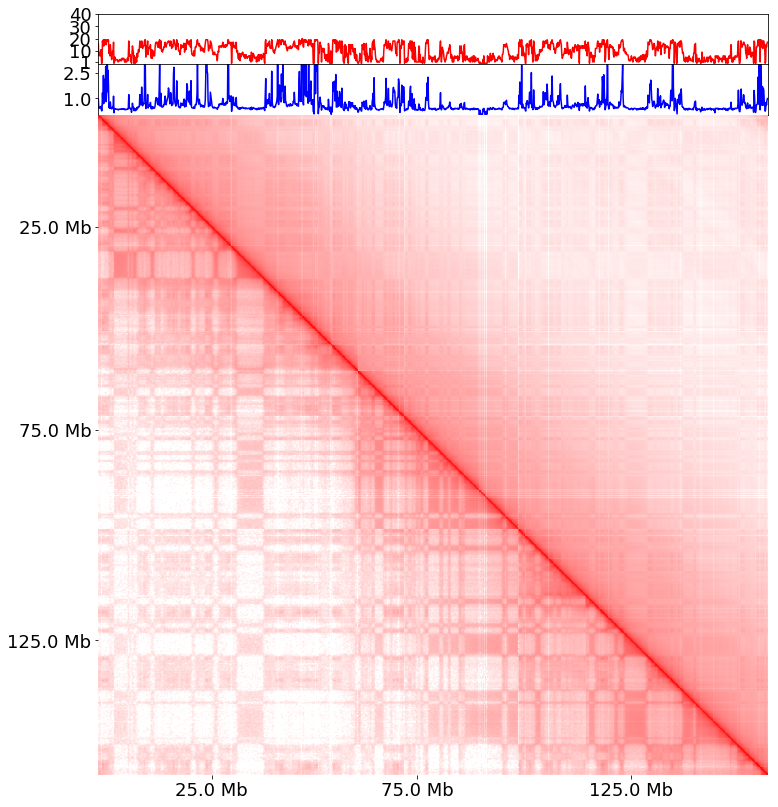

In [19]:
        #smoo_exp_df_cc.rename(index=labeldict,columns=labeldict,inplace=True)
        #print(smoo_exp_df_cc)

        bigwig_mean_df = bigwig_mean_dfs[chrindex].drop(igno,axis=0).reset_index()

        fig = plt.figure(figsize=(12,14))
        gs = grd.GridSpec(3, 1, height_ratios=[1,1,13],wspace=0, hspace=0)
        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[1],sharex=ax0)
        #ax2 = plt.subplot(gs[2],sharex=ax0)
        ax3 = plt.subplot(gs[2],sharex=ax0)
        #ax3 = plt.subplot(gs[2],sharex=ax1)
        #plt.title("Chromosome " + chrom + ":" + "all")
        #ax1.plot(np.array(sigs)[lower:upper,:])
        #ax0.plot(bigwig_mean_df['H3K27ac'],'r')
        #ax0.set_ylim([0,3])
        #ax0.set_yticks([1,2.5])
        ax0.plot(bigwig_mean_df[name+'-tiles'],'r')
        #ax0.set_ylim([0,3])
        #ax0.set_yticks([1,2.5])
        ax0.set_yticks([1,10,20,30,40])
        plt.setp(ax0.get_xticklabels(), visible=False)
        ax1.plot(bigwig_mean_df[name],'b')
        ax1.set_ylim([0,3])
        ax1.set_yticks([1,2.5])
        #ax1.set_yticks([1,10,20,30,40])
        plt.setp(ax1.get_xticklabels(), visible=False)
        """
        ax2.plot(bigwig_mean_df['Eigenvector'],'k')
        ax2.hlines(y=0,xmin=0,xmax=len(oe_correlations),colors='k',linestyle='dashed')
        #ax2.set_ylim([-0.04,0.04])
        ax2.set_yticks([])
        ax2.set_yticks([0])
        plt.setp(ax2.get_xticklabels(), visible=False)
        """
        #sns.heatmap(exp_zmatrix[lower:upper,lower:upper],xticklabels=True,yticklabels=False,ax=ax2,cbar=False,cmap='seismic',center=0)

        #here we make a dataframe:

        #print(ticks)
        #print(labels)
        ax3 = sns.heatmap(log_ind_df_cc,ax=ax3,cbar=False,cmap=br,xticklabels=False,yticklabels=False,vmin=0)
        #ax3.imshow(log_exp_df_cc,cmap=br,vmin=0,interpolation='bilinear',extent=[0,len(log_exp_df_cc),len(log_exp_df_cc),0])
        plt.yticks(rotation=0) 
        #ax3.set_xticks()
        #ax3.imshow(corr_df,cmap='seismic',interpolation='bicubic',vmin=-1,vmax=1,aspect='equal')
        #plt.setp(ax3.yaxis.get_majorticklabels(), va="center")

        ticks = []
        labels = []
        for x in range(250,len(expecteds[chrindex]),500):
            #this gets the index of the right name
            try:
                i = log_exp_df_cc.index.get_loc(x)
            except KeyError:
                #here now we want to find the proper location and put the tick there
                i = log_exp_df_cc.index.searchsorted(x)
            #print(smoo_exp_df_cc.iloc[i-2:i+2,i-2:i+2])
            ticks.append(i)
            labels.append("{0} Mb".format(x/(1000000//resolution)))

        #print(ticks)
        #print(labels)
        plt.xticks(ticks,labels)
        plt.yticks(ticks,labels)
        #plt.savefig("./figures/{0}-sims/{0}-Chr{1}:mappedwith-{2}-avgallbutself:{3}kb.png".format(celltype,chrnames[chrindex],mapcelltype,resolution//1000),format='png')
        plt.show()